# Distinguishability
This investigates how a disease spreads when the same individuals travel to a patch instead of different individuals.

Using array indexing, the first axis $i$ selects the population, the second axis $j$ the subpopulation.


In [490]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [539]:
import numpy as np
import matplotlib.pyplot as plt
from distinguishability_model import simulate

od_matrix = np.array([[100, 10, 10],
                      [15, 150, 10],
                      [20, 5, 200]], dtype=int)
beta = 1.8
gamma = 0.3
t_max = 100
seed_subpatch = [0, 1]

In [492]:
od_matrix

array([[100,  10,  10],
       [ 15, 150,  10],
       [ 20,   5, 200]])

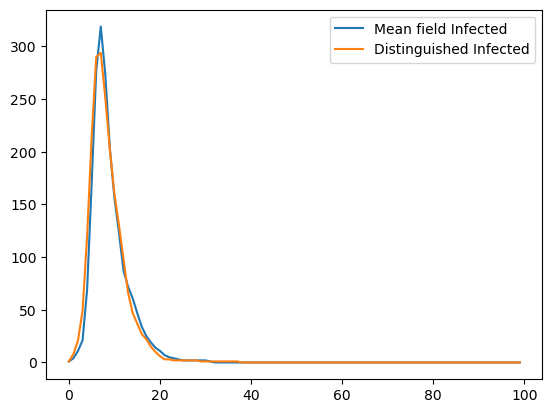

In [493]:
u_s, u_i, u_r = simulate(beta=beta, gamma=gamma, od_matrix=od_matrix, t_max=t_max, seed_subpatch=seed_subpatch,
                         distinguish=False)
d_s, d_i, d_r = simulate(beta=beta, gamma=gamma, od_matrix=od_matrix, t_max=t_max, seed_subpatch=seed_subpatch,
                         distinguish=True)
# plt.plot(u_s.sum(axis=(1, 2)), label='Mean field Susceptible')
plt.plot(u_i.sum(axis=(1, 2)), label='Mean field Infected')
#plt.plot(u_r.sum(axis=(1, 2)), label='Mean field Recovered')
#plt.plot(d_s.sum(axis=(1, 2)), label='Distinguished Susceptible')
plt.plot(d_i.sum(axis=(1, 2)), label='Distinguished Infected')
#plt.plot(d_r.sum(axis=(1, 2)), label='Distinguished Recovered')
plt.legend()
plt.show()

# Use ONS data

In [494]:
import pandas as pd

In [504]:
commuter_data = pd.read_csv("commuter_data/commuter_matrix.csv", index_col=0)
commuter_matrix = commuter_data.values
patch_ids = commuter_data.index.values

In [496]:
commuter_matrix

array([[26317,  1500,   671, ...,     2,     3,     0],
       [  770, 37147,  4536, ...,     0,     0,     0],
       [  608,  8451, 35959, ...,     0,     0,     0],
       ...,
       [    0,     1,     7, ..., 53541,    27,    94],
       [    0,     0,     0, ...,   159, 52307,   186],
       [    0,     0,     0, ...,   242,   256, 17725]])

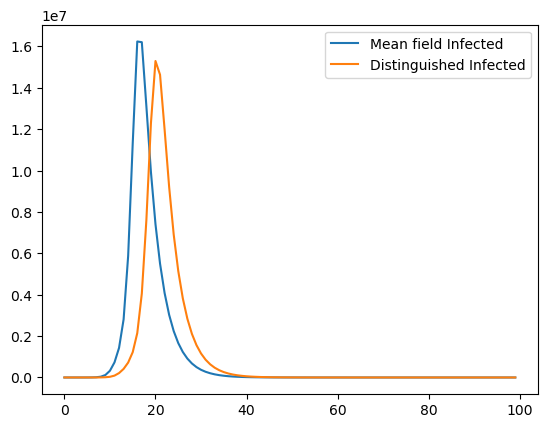

In [497]:
meanfield_ons = simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix, t_max=t_max, seed_subpatch=seed_subpatch,
                         distinguish=False)
distinguished_ons = simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix, t_max=t_max,
                             seed_subpatch=seed_subpatch, distinguish=True)
plt.plot(meanfield_ons[1].sum(axis=(1, 2)), label='Mean field Infected')
plt.plot(distinguished_ons[1].sum(axis=(1, 2)), label='Distinguished Infected')
plt.legend()
plt.show()

(array([2., 1., 0., 1., 1., 1., 0., 1., 1., 2.]),
 array([ -347. ,  1796.2,  3939.4,  6082.6,  8225.8, 10369. , 12512.2,
        14655.4, 16798.6, 18941.8, 21085. ]),
 <BarContainer object of 10 artists>)

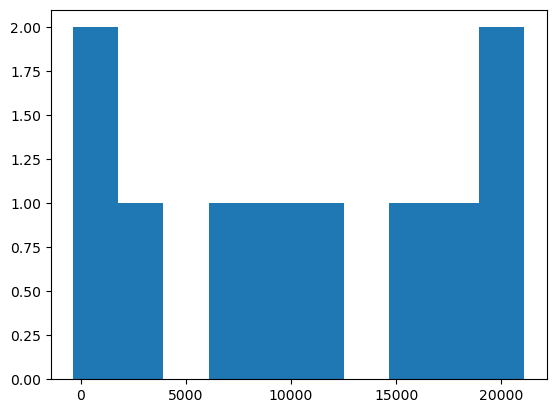

In [499]:
iterations = 10
peak_difference = np.zeros(iterations)
for i in range(iterations):
    _, i_m, _ = simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix, t_max=t_max, seed_subpatch=seed_subpatch,
                         distinguish=False)
    _, i_d, _ = simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix, t_max=t_max, seed_subpatch=seed_subpatch,
                         distinguish=True)
    peak_difference[i] = i_m.max() - i_d.max()
plt.hist(peak_difference)


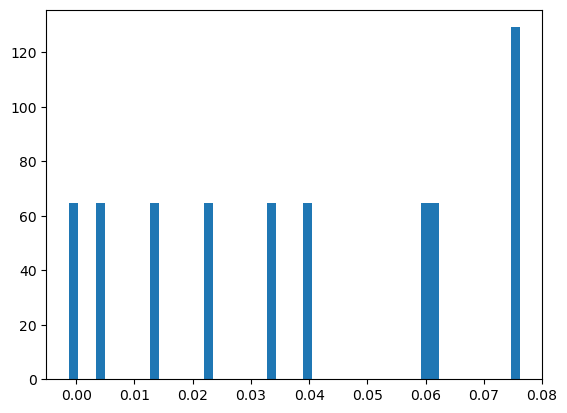

In [500]:
population = commuter_matrix.sum(axis=(0, 1))
plt.hist(peak_difference / population * 100, bins=50, density=True)
plt.show()

# Visualise in space

In [565]:
import geopandas as gpd
from matplotlib import cm
from matplotlib.colors import Normalize
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
lads = gpd.read_file("commuter_data/shapefiles/LAD_DEC_2021_GB_BFC.shp")


In [564]:
def tabulate(sim):
    _, infections, _ = sim
    time_series = (infections.sum(axis=2)).T
    dataframes = []
    for j in range(time_series.shape[0]):
        dataframes.append(pd.DataFrame({'t': np.arange(time_series.shape[1]), 'i': time_series[j, :],
                                        'LAD21CD': np.repeat(patch_ids[j], time_series.shape[1])}))
    infection_data = pd.concat(dataframes).merge(lads, on='LAD21CD', how='inner')
    infection_geo = gpd.GeoDataFrame(infection_data, geometry=infection_data.geometry, crs="EPSG:27700")
    return infection_geo

In [558]:
animation_data = tabulate(simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix,
                                   t_max=t_max, seed_subpatch=seed_subpatch, distinguish=True))
animation_data.head()

t   i    LAD21CD     LAD21NM LAD21NMW   BNG_E   BNG_N     LONG      LAT  \
0  0   1  E06000001  Hartlepool     None  447160  531474 -1.27018  54.6761   
1  1   1  E06000001  Hartlepool     None  447160  531474 -1.27018  54.6761   
2  2   4  E06000001  Hartlepool     None  447160  531474 -1.27018  54.6761   
3  3  14  E06000001  Hartlepool     None  447160  531474 -1.27018  54.6761   
4  4  41  E06000001  Hartlepool     None  447160  531474 -1.27018  54.6761   

                               GlobalID  \
0  cb7275ce-d16e-45f7-8e7d-33032fb9df9d   
1  cb7275ce-d16e-45f7-8e7d-33032fb9df9d   
2  cb7275ce-d16e-45f7-8e7d-33032fb9df9d   
3  cb7275ce-d16e-45f7-8e7d-33032fb9df9d   
4  cb7275ce-d16e-45f7-8e7d-33032fb9df9d   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

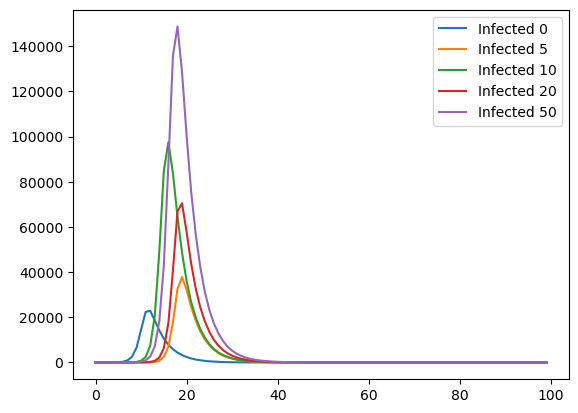

In [559]:
patch_numbers = [0, 5, 10, 20, 50]
for patch_number in patch_numbers:
    patch_id = patch_ids[patch_number]
    patch_data = animation_data[animation_data['LAD21CD'] == patch_id]

    plt.plot(patch_data['t'], patch_data['i'], label=f'Infected {patch_number}')
plt.legend()
plt.show()

In [573]:
df = tabulate(simulate(beta=beta, gamma=gamma, od_matrix=commuter_matrix,
                       t_max=t_max, seed_subpatch=seed_subpatch, distinguish=True))
#Create the colormap using the min/max values
vmin = df['i'].min()
vmax = df['i'].max()
COLORMAP = 'RdYlGn'
cmap = cm.ScalarMappable(Normalize(vmin, vmax), COLORMAP)
fig, [ax, cax] = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw={"width_ratios": [50, 1]})
ax.axis('off')
#Create the colorbar with colormap
plt.colorbar(mappable=cmap, cax=cax)
cax.set_title('Infection prevalence')


def plot_day(t: int):
    data = df[df['t'] == t]

    ax.set_title('Infection Prevalence: t={}'.format(t))

    data.plot(column='i', ax=ax, cmap=COLORMAP)

    plt.close()
anim = FuncAnimation(fig, plot_day,
                    frames = range(0, t_max),
                    interval = 100)


HTML(anim.to_jshtml())

KeyboardInterrupt: 